<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/Decision_Tree_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement

The goal is to predict survival of passengers travelling in RMS Titanic using Logistic regression

Data loading and Description :

The dataset consists of the information about people boarding the famous RMS Titanic. 
Various variables present in the dataset includes data of age, sex, fare, ticket etc.

The dataset comprises of 891 observations of 12 columns. Below is a table showing names of all the columns and their description.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import pandas_profiling

In [0]:
titanic_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Preprocessing the Data:

Dealing with missing values

Dropping/Replacing missing entries of Embarked.

Replacing missing values of Age with median values.

Dropping the column 'Cabin' as it has too many null values.

Replacing 0 values of fare with median values.

In [5]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [6]:
titanic_data["Age"].fillna(titanic_data["Age"].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [0]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [9]:
titanic_data["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [12]:
print(titanic_data.Fare.get_values())

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.       7.8958  41.5792   7.8792   8.05    15.5      7.75
  21.6792  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5
  10.5      7.2292  27.75    46.9      7.2292  80.      83.475   27.9
  27.7208  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9
  73.5     14.4542  56.4958   7.65     7.8958   8.05    29.      12.475
   9.       9.5      7.7875  47.1     10.5     15.85    34.375    8.05
 263.       8.05     8.05     7.8542  61.175   20.575    7.25     8.05
  34.6542  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542
   7.925    7.8958   7.65     7.775    7.8958  24.15    52.      14.4542
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


In [13]:
titanic_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
titanic_data[(titanic_data["Fare"]==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S


In [0]:
titanic_data["Fare"]=titanic_data["Fare"].replace(0,titanic_data["Fare"].median())

In [0]:
titanic_data["Family_Size"]=titanic_data["SibSp"]+titanic_data["Parch"]+1

In [0]:
titanic_data["Gender_Class"]=titanic_data.apply(lambda x:"child" if x["Age"]<15 else x["Sex"],axis=1)

In [32]:
titanic_data[titanic_data["Age"]<15].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Gender_Class
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,3,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,1,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,6,child


In [33]:
titanic_data[titanic_data["Age"]>15].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Gender_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [35]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Gender_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [0]:
titanic_data=pd.get_dummies(titanic_data,columns=["Embarked","Gender_Class"],drop_first=True)

In [38]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family_Size,Embarked_Q,Embarked_S,Gender_Class_female,Gender_Class_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,0,0,1,0


In [40]:
titanic_data.drop(["PassengerId","Age","SibSp","Parch","Sex","Ticket","Name"],axis=1)

,Survived,Pclass,Fare,Family_Size,Embarked_Q,Embarked_S,Gender_Class_female,Gender_Class_male
0,0,3,7.2500,2,0,1,0,1
1,1,1,71.2833,2,0,0,1,0
2,1,3,7.9250,1,0,1,1,0
3,1,1,53.1000,2,0,1,1,0
4,0,3,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,13.0000,1,0,1,0,1
887,1,1,30.0000,1,0,1,1,0
888,0,3,23.4500,4,0,1,1,0
889,1,1,30.0000,1,0,0,0,1


<Figure size 720x504 with 0 Axes>

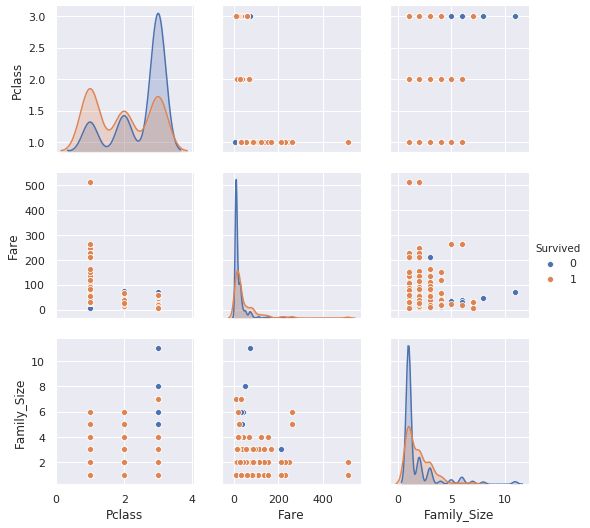

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,7))
sns.pairplot(titanic_data,vars=["Pclass","Fare","Family_Size"],hue="Survived")

Below Observations:

More people of Pclass 1 survived than died (First peak of red is higher than blue)

More people of Pclass 3 died than survived (Third peak of blue is higher than red)

More people of age group 20-40 died than survived.
Most of the people paying less fare died.

Establishing coorelation between all the features using heatmap.:


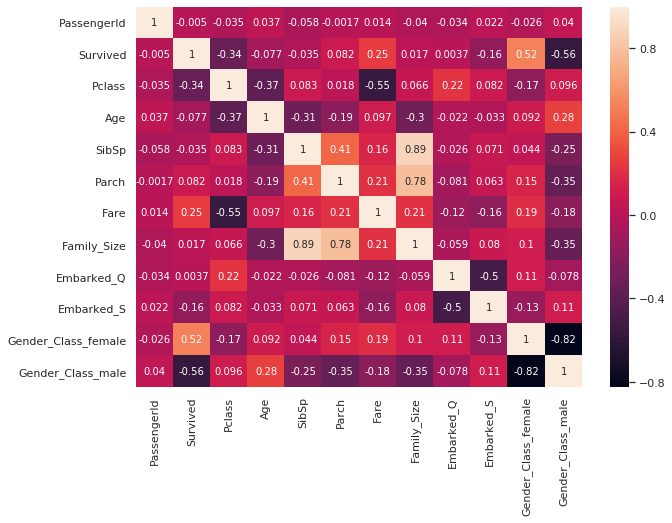

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(titanic_data.corr(),annot=True)

Age and Pclass are negatively corelated with Survived.

FamilySize is made from Parch and SibSb only therefore high positive corelation among them.

Fare and FamilySize are positively coorelated with Survived.
With high corelation we face redundancy issues.

Introduction to Decision Tree :

A decision tree is one of most frequently and widely used supervised machine learning algorithms that can perform both regression and classification tasks.
The intuition behind the decision tree algorithm is simple, yet also very powerful.

Everyday we need to make numerous decisions, many smalls and a few big.
So, Whenever you are in a dilemna, if you'll keenly observe your thinking process. You'll find that, you are unconsciously using decision tree approcah or you can also say that decision tree approach is based on our thinking process.





A decision tree split the data into multiple sets.Then each of these sets is further split into subsets to arrive at a decision.

It is a very natural decision making process asking a series of question in a nested if then else statement.

On each node you ask a question to further split the data held by the node.





So, lets understand what is a decision tree with a help of a real life example.

Consider a scenario where a person asks you to lend them your car for a day, and you have to make a decision whether or not to lend them the car. There are several factors that help determine your decision, some of which have been listed below:

Is this person a close friend or just an acquaintance?

If the person is just an acquaintance, then decline the request;

if the person is friend, then move to next step.
Is the person asking for the car for the first time?

If so, lend them the car,
otherwise move to next step.
Was the car damaged last time they returned the car?

If yes, decline the request;
if no, lend them the car.

The structure of decision tree resembles an upside down tree, with its roots at the top and braches are at the bottom.
 The end of the branch that doesnt split any more is the decision or leaf.

Now, lets see what is Decision tree algorithm.
Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems.

It works for both categorical and continuous input and output variables.

In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables

Important Terminology related to Decision Trees
Let’s look at the basic terminology used with Decision trees:

Root Node:
It represents entire population or sample and this further gets divided into two or more homogeneous sets.

Splitting:
It is a process of dividing a node into two or more sub-nodes.

Decision Node:
When a sub-node splits into further sub-nodes, then it is called decision node.

Leaf/ Terminal Node:
Nodes do not split is called Leaf or Terminal node.

Pruning:
When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.

Branch / Sub-Tree:
A sub section of entire tree is called branch or sub-tree.

Parent and Child Node:
A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.



Types of Decision Trees
Types of decision tree is based on the type of target variable we have. It can be of two types:

Categorical Variable Decision Tree:
Decision Tree which has categorical target variable then it called as categorical variable decision tree.

Continuous Variable Decision Tree:
Decision Tree has continuous target variable then it is called as Continuous Variable Decision Tree.

Example:

Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (Yes/ No).
For this we are predicting values for categorical variable. So, the decision tree approach that will be used is Categorical Variable Decision Tree.

Now, suppose insurance company does not have income details for all customers. But, we know that this is an important variable, then we can build a decision tree to predict customer income based on occupation, product and various other variables.

In this case, we are predicting values for continuous variable. So , This approach is called Continuous Variable Decision Tree.

Concept of Homogenity
Homogenous populations are alike and heterogeneous populations are unlike.

A heterogenous population is one where individuals are not similar to one another.
For example, you could have a heterogenous population in terms of humans that have migrated from different regions of the world and currently live together. That population would likely be heterogenous in regards to height, hair texture, disease immunity, and other traits because of the varied background and genetics.

Note: In real world you would never get this level of homogeniety. So out of the hetrogenous options you need to select the one having maximum homoginiety. To select the feature which provide maximum homoginety we use gini & entropy techniques.

What Decision tree construction algorithm will try to do is to create a split in such a way that the homogeneity of different pieces must be as high as possible.

Example

Let’s say we have a sample of 30 students with three variables:

Gender (Boy/ Girl)
Class (IX/ X) and,
Height (5 to 6 ft).
15 out of these 30 play cricket in leisure time. Now, I want to create a model to predict who will play cricket during leisure period? In this problem, we need to segregate students who play cricket in their leisure time based on highly significant input variable among all three.

This is where decision tree helps, it will segregate the students based on all values of three variables and identify the variable, which creates the best homogeneous sets of students (which are heterogeneous to each other). In the snapshot below, you can see that variable Gender is able to identify best homogeneous sets compared to the other two variables.

**How does a tree decides where to split?**

The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

The algorithm selection is also based on type of target variables. Let’s look at the most commonly used algorithms in decision tree:

Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.

It works with categorical target variable “Success” or “Failure”.
It performs only Binary splits
Higher the value of Gini higher the homogeneity.
CART (Classification and Regression Tree) uses Gini method to create binary splits.
Steps to Calculate Gini for a split

Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (1 - p2 - q2).
Calculate Gini for split using weighted Gini score of each node of that split
Example: – Referring to example used above, where we want to segregate the students based on target variable ( playing cricket or not ). In the snapshot below, we split the population using two input variables Gender and Class. Now, I want to identify which split is producing more homogeneous sub-nodes using Gini index.

**Gini Index:**

Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.

*It works with categorical target variable “Success” or “Failure”.*
*It performs only Binary splits*

*Higher the value of Gini higher the homogeneity.*

CART (Classification and Regression Tree) uses Gini method to create binary splits.

**Steps to Calculate Gini for a split**

Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (1 - p2 - q2).
Calculate Gini for split using weighted Gini score of each node of that split
Example: – Referring to example used above, where we want to segregate the students based on target variable ( playing cricket or not ). In the snapshot below, we split the population using two input variables Gender and Class. Now, I want to identify which split is producing more homogeneous sub-nodes using Gini index.

Gini for Root node:

1 - (0.5 * 0.5) - (0.5 * 0.5) = 0.50
Split on Gender:

Gini for sub-node Female
1 - (0.2 * 0.2) - (0.8 * 0.8) = 0.32

Gini for sub-node Male
1 - (0.65 * 0.65) - (0.35 * 0.35) = 0.45

Weighted Gini for Split Gender
(10/30) * 0.32 + (20/30) * 0.45 = 0.41

Split on Class :

Gini for sub-node Class IX =
1 - (0.43 * 0.43) - (0.57 * 0.57) = 0.49

Gini for sub-node Class X =
1 - (0.56 * 0.56) - (0.44 * 0.44) = 0.49

Calculate weighted Gini for Split Class

(14/30) * 0.51 + (16/30) * 0.51 = 0.49

Above, you can see that: Gini score for Split on Gender < Gini score for Split on Class.
Also, Gini score for Gender < Gini score for root node.
Hence, the node split will take place on Gender.

**Information Gain :**

less impure node requires less information to describe it.

more impure node requires more information.

Information theory is a measure to define this degree of disorganization in a system by a parameter known as Entropy.

If the sample is completely homogeneous, then the entropy is zero and

If the sample is an equally divided (50% – 50%), it has entropy of one.

Entropy can be calculated using formula:

p__ & __q is probability of success and failure respectively in that node.

Information Gain = 1 - Entropy.

The model will choose the split which facilitates maximum information gain, which in turn means minimum Entropy.

So, it chooses the split which has lowest entropy compared to parent node and other splits.

The lesser the entropy, the better it is.

Steps to calculate entropy for a split:

Calculate entropy of parent node

Calculate entropy of each individual node of split and

Calculate weighted average of all sub-nodes available in split.

Caluclate the Information Gain in various split options w.r.t parent node

Choose the split with highest Information Gain.

Example: Let’s use this method to identify best split for student example.

Entropy for parent node
- (15/30) log2 (15/30) – (15/30) log2 (15/30) = 1.

Here 1 shows that it is a impure node.

Entropy for Female node
- (2/10) log2 (2/10) – (8/10) log2 (8/10) = 0.72

Entropy for male node
- (13/20) log2 (13/20) – (7/20) log2 (7/20) = 0.93

Entropy for split Gender = Weighted entropy of sub-nodes
(10/30) * 0.72 + (20/30) * 0.93 = 0.86

Information Gain for split Gender = Entropy of Parent Node - Weighted entropy for Split Gender
1 - 0.86 = 0.14

Entropy for Class IX node,
-(6/14) log2 (6/14) – (8/14) log2 (8/14) = 0.99

Entropy for Class X node,
-(9/16) log2 (9/16) – (7/16) log2 (7/16) = 0.99.

Entropy for split Class,
(14/30) * 0.99 + (16/30) * 0.99 = 0.99

Information Gain for split Class = Entropy of Parent Node - Weighted entropy for Split Class

1 - 0.99 = 0.01

Observe that:
Information Gain for Split on Gender > Information Gain for Split on Class,
So, the tree will split on Gender.

**Advantage of Decision Trees:**


Easy to Understand:

Decision tree output is very easy to understand even for people from non-analytical background. 

It does not require any statistical knowledge to read and interpret them.

Its graphical representation is very intuitive and users can easily relate their hypothesis.

Less data cleaning required:

It requires less data cleaning compared to some other modeling techniques.

It is not influenced by outliers and missing values to a fair degree.

Data type is not a constraint:

It can handle both numerical and categorical variables.

Non Parametric Method:

Decision tree is considered to be a non-parametric method. This means that 

decision trees have no assumptions about the space distribution and the classifier structure.

**Shortcomings of Decision Trees:**


**Over fitting**:

Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning (discussed in detailed below).

**Not a great contributor for regression**:

While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.

In [0]:
x=titanic_data.loc[:,titanic_data.columns!="Survived"]

In [0]:
y=titanic_data["Survived"]

In [0]:
from sklearn.model_selection import train_test_split
def split(x,y):
  return train_test_split(x,y,test_size=0.20,random_state=1)

In [0]:
x_train,y_train,x_test,y_test=split(x,y)

In [59]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 14)
(179, 14)
(712,)
(179,)


In [0]:
from sklearn import tree

In [61]:
model=tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

ValueError: ignored

In [62]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family_Size,Embarked_Q,Embarked_S,Gender_Class_female,Gender_Class_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,0,1,0,1


In [0]:
titanic_data.drop(["PassengerId","Name","Sex","SibSp","Parch","Ticket"],axis=1,inplace=True)

In [64]:
titanic_data.head(2)

,Survived,Pclass,Age,Fare,Family_Size,Embarked_Q,Embarked_S,Gender_Class_female,Gender_Class_male
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,0,0,1,0


In [0]:
x=titanic_data.loc[:,titanic_data.columns!="Survived"]
y=titanic_data["Survived"]

In [0]:
x_train,y_train,x_test,y_test=split(x,y)

In [67]:
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

ValueError: ignored

In [69]:
titanic_data.isnull().sum()

Survived                 0
Pclass                   0
Age                    177
Fare                     0
Family_Size              0
Embarked_Q               0
Embarked_S               0
Gender_Class_female      0
Gender_Class_male        0
dtype: int64

In [0]:
titanic_data["Age"].fillna(titanic_data["Age"].median(),inplace=True)

In [73]:
titanic_data.isnull().sum()

Survived               0
Pclass                 0
Age                    0
Fare                   0
Family_Size            0
Embarked_Q             0
Embarked_S             0
Gender_Class_female    0
Gender_Class_male      0
dtype: int64

In [74]:
titanic_data[(titanic_data["Fare"]==0)]

,Survived,Pclass,Age,Fare,Family_Size,Embarked_Q,Embarked_S,Gender_Class_female,Gender_Class_male


In [0]:
x=titanic_data.loc[:,titanic_data.columns!="Survived"]
y=titanic_data["Survived"]


In [76]:
x_train.head()

,Pclass,Age,Fare,Family_Size,Embarked_Q,Embarked_S,Gender_Class_female,Gender_Class_male
301,3,28.0,23.2500,3,1,0,0,1
309,1,30.0,56.9292,1,0,0,1,0
516,2,34.0,10.5000,1,0,1,1,0
120,2,21.0,73.5000,3,0,1,0,1
570,2,62.0,10.5000,1,0,1,0,1


In [77]:
x_train.shape

(712, 8)

In [78]:
y_train.shape

(179, 8)

In [80]:
y.shape

(891,)

In [81]:
x.shape

(891, 8)

In [0]:
from sklearn.model_selection import train_test_split
def split(x,y):
  return train_test_split(x,y,test_size=0.20,random_state=1)

In [0]:
xtrain,ytrain,xtest,ytest=split(x,y)

In [86]:
print(xtrain.shape)
print(ytrain.shape)

(712, 8)
(179, 8)


In [87]:
y.shape

(891,)

In [89]:
x.head()

,Pclass,Age,Fare,Family_Size,Embarked_Q,Embarked_S,Gender_Class_female,Gender_Class_male
0,3,22.0,7.2500,2,0,1,0,1
1,1,38.0,71.2833,2,0,0,1,0
2,3,26.0,7.9250,1,0,1,1,0
3,1,35.0,53.1000,2,0,1,1,0
4,3,35.0,8.0500,1,0,1,0,1


In [90]:
x.shape

(891, 8)

In [91]:
print(xtrain.shape)
print(ytrain.shape)

(712, 8)
(179, 8)


In [0]:
from sklearn.model_selection import train_test_split
x_train,Y_train,x_test,Y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [95]:
print(Y_train.shape)

(179, 8)


In [97]:
X = titanic_data.loc[:,titanic_data.columns != 'Survived']
X.head()

,Pclass,Age,Fare,Family_Size,Embarked_Q,Embarked_S,Gender_Class_female,Gender_Class_male
0,3,22.0,7.2500,2,0,1,0,1
1,1,38.0,71.2833,2,0,0,1,0
2,3,26.0,7.9250,1,0,1,1,0
3,1,35.0,53.1000,2,0,1,1,0
4,3,35.0,8.0500,1,0,1,0,1


In [105]:
y = titanic_data["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [107]:
print(X_train.shape)
print(y_train.shape)

(712, 8)
(712,)


In [108]:
from sklearn import tree
model=tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_test,y_pred_test)

0.7821229050279329

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(ytest,y_pred_test))
print(confusion_matrix)

    0   1
0  91  15
1  24  49


In [113]:
confusion_matrix.index=["Actual Died","Actual Survived"]
confusion_matrix.columns=["Predicted Died","Predicted Survived"]
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  91                  15
Actual Survived              24                  49


Correct : 140 , incorrect : 39

In [114]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython

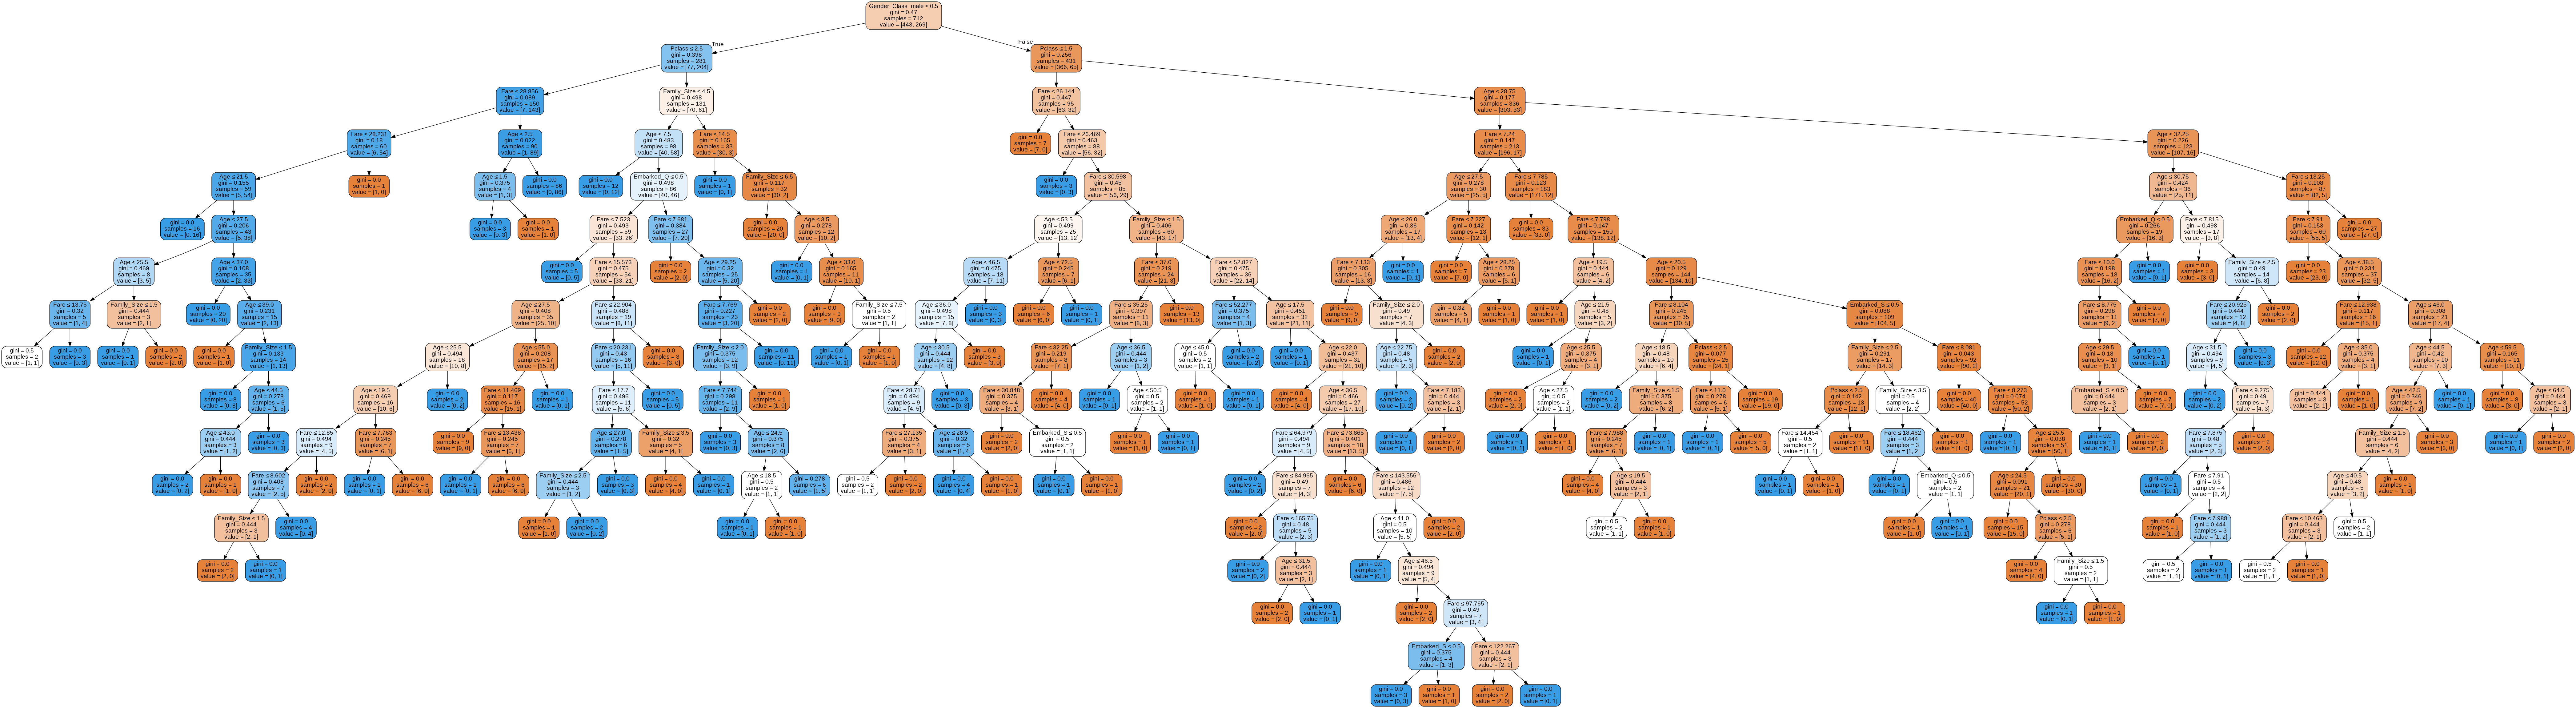

In [115]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())


**now we will try to check via Grid Search CV:**

In [0]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier=DecisionTreeClassifier(random_state=0)
tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                             

In [0]:
from sklearn.model_selection import GridSearchCV
Grid_cv=GridSearchCV(DecisionTreeClassifier,tree_para,cv=10,refit="AUC")

In [125]:
Grid_cv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
             

In [126]:
y_pred_test_grid=Grid_cv.predict(x_test)
accuracy_score(y_test,y_pred_test_grid)

0.7932960893854749

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,y_pred_test_grid))
print(confusion_matrix)
confusion_matrix.index=["Actual Died","Actual Survived"]
confusion_matrix.columns=["Predicted Died","Predicted Survived"]
print(confusion_matrix)

     0   1
0  100   6
1   31  42
                 Predicted Died  Predicted Survived
Actual Died                 100                   6
Actual Survived              31                  42


correct=142 , incorrect= 37